### Student Information
Name: 孫秉新

Student ID: 113034511

GitHub ID: BingHsin

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here

# ====== 需要的套件 ======
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 文字處理 / 向量化 / 模型
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 互動圖
import plotly.express as px

# 設定畫圖風格
sns.set(style='whitegrid')
%matplotlib inline


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# 用相對路徑讀檔
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

print(df.shape)
df.head()


(847, 16)


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [3]:
print(df.columns.tolist())
df.info()      # 看每欄位非 null 數量與型態
df.describe(include='all')
df.head(5).T    # 轉頭看欄位直觀


['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non

,0,1,2,3,4
type,comment,comment,comment,post,comment
datetime,2025-04-11 17:29:56,2025-04-12 1:12:19,2025-04-10 15:09:41,2023-08-30 17:12:55,2025-04-11 14:48:05
post_id,mmli62w,mmnu7v9,mmeevio,165kllm,mmkl6bw
subreddit,wallstreetbets,wallstreetbets,StockMarket,stockstobuytoday,StockMarket
title,Retardation is on the menu boys! WSB is so back,Retail giant TARGET has now declined for 10 co...,How do you feel about a sitting president maki...,Who knows more? $VMAR,The Trump administration is begging Xi Jinping...
author,StickyTip420,Comfortable-Dog-8437,Btankersly66,emiljenfn,Just-Big6411
url,https://i.redd.it/0yq2ftren8ue1.jpeg,https://i.redd.it/7tl6puv9waue1.jpeg,https://apnews.com/article/trump-truth-social-...,https://www.reddit.com/r/stockstobuytoday/comm...,https://edition.cnn.com/2025/04/10/politics/tr...
upvotes,0,-15,1,30,1
downvotes,NaN,NaN,NaN,0.0,NaN
upvote_ratio,NaN,NaN,NaN,0.98,NaN


In [4]:
# 檢視欄位名稱
print(df.columns.tolist())

# 需要的欄位
target_cols = ['text', 'label', 'datetime', 'upvotes', 'entities']

# 取交集，避免有些欄位不存在會報錯
cols_needed = [c for c in target_cols if c in df.columns]
print("Using columns:", cols_needed)

# 建立新的 dataframe
Xdf = df[cols_needed].copy()

# 丟掉 text 為空的列
Xdf = Xdf.dropna(subset=['text']).reset_index(drop=True)

Xdf.head()



['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']
Using columns: ['text', 'label', 'datetime', 'upvotes', 'entities']


,text,label,datetime,upvotes,entities
0,Calls on retards,-1.0,2025-04-11 17:29:56,0,[]
1,Stunt as in like why did they even make a big ...,0.0,2025-04-12 1:12:19,-15,"['Stunt', 'company', 'deal', 'place']"
2,Seeing lots of red in the ticker.,0.0,2025-04-10 15:09:41,1,['ticker']
3,Vision Marine Technologies Inc. is rewriting t...,1.0,2023-08-30 17:12:55,30,"['watercraft', 'skill', 'power', ']', 'feat', ..."
4,He didn’t say thank you.,-1.0,2025-04-11 14:48:05,1,[]


Label unique: [-1.  0.  1.]
label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64


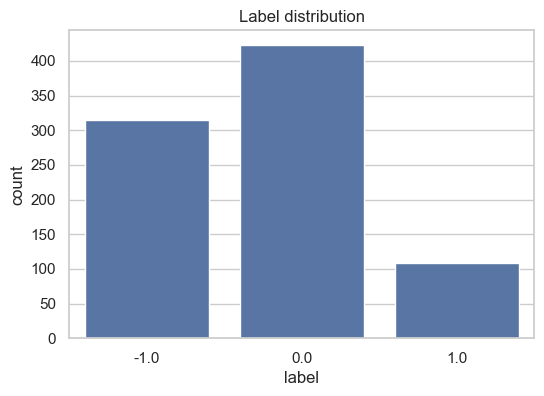

In [5]:
# 檢查 label 有沒有缺值、種類、分布
print("Label unique:", Xdf['label'].unique())
print(Xdf['label'].value_counts())

# 繪圖
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=Xdf, order=sorted(Xdf['label'].unique()))
plt.title('Label distribution')
plt.show()


In [6]:
import helpers.data_mining_helpers as dmh

Xdf.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,datetime,upvotes,entities
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


In [7]:
Xdf.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844    False
845    False
846    False
Length: 847, dtype: bool

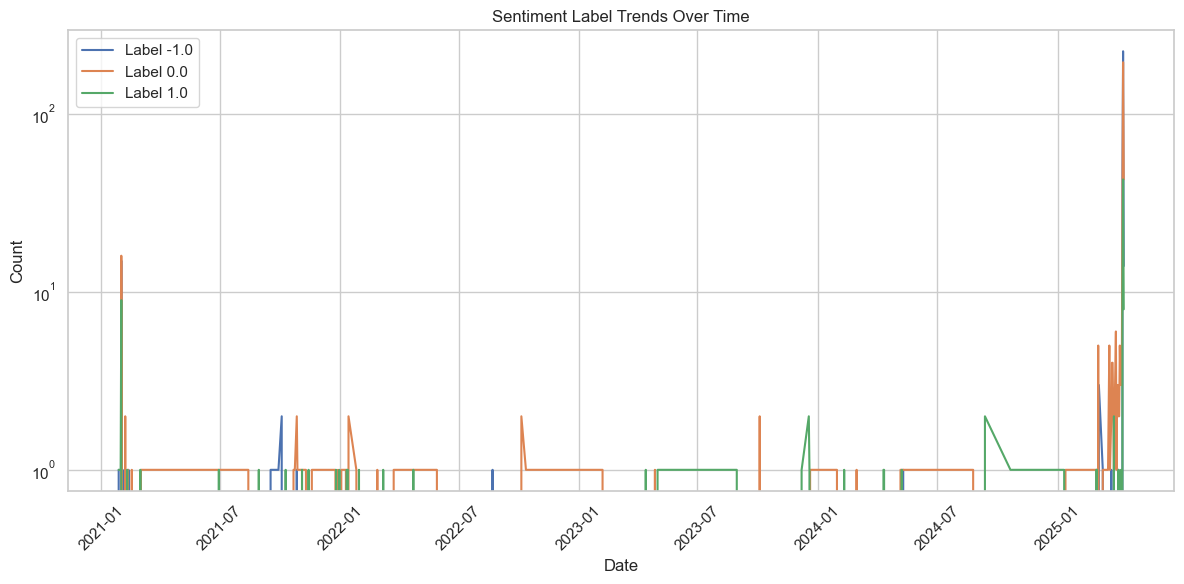

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 確保 datetime 欄位轉成 datetime 格式
Xdf['datetime'] = pd.to_datetime(Xdf['datetime'], errors='coerce')

# 依時間排序
Xdf = Xdf.sort_values('datetime')

# 以日期為單位，統計不同 label 的數量
label_trend = Xdf.groupby([Xdf['datetime'].dt.date, 'label']).size().unstack(fill_value=0)

# 畫圖
plt.figure(figsize=(12,6))
for label in label_trend.columns:
    plt.plot(label_trend.index, label_trend[label], label=f"Label {label}")

plt.xlabel("Date")
plt.ylabel("Count")
plt.yscale("log")  # <-- 對數刻度
plt.title("Sentiment Label Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


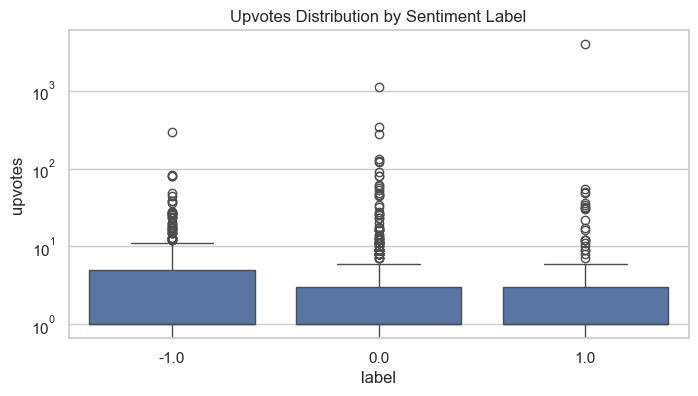

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(x='label', y='upvotes', data=Xdf)
plt.yscale("log")  # 若 upvotes 差距大
plt.title("Upvotes Distribution by Sentiment Label")
plt.show()


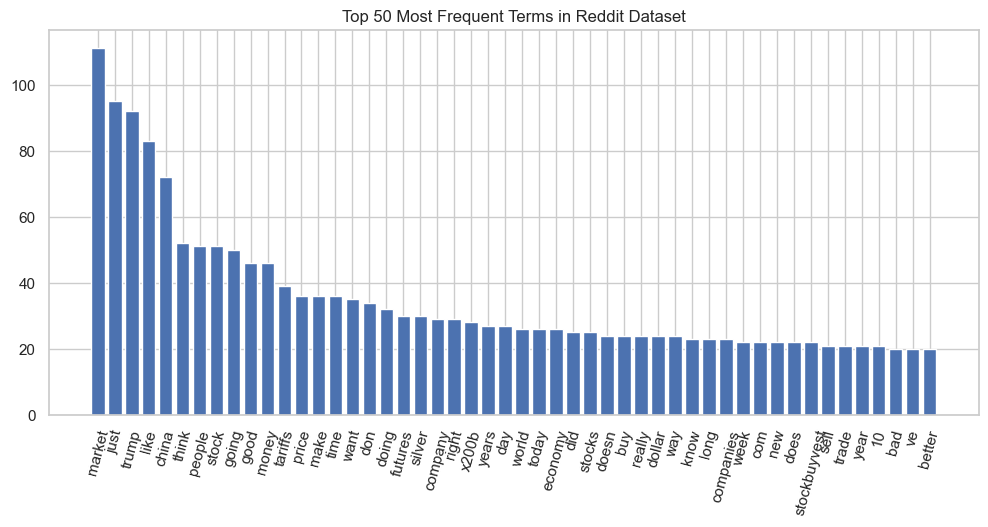

,term,frequency
0,market,111
1,just,95
2,trump,92
3,like,83
4,china,72
5,think,52
6,people,51
7,stock,51
8,going,50
9,good,46


In [10]:
# from sklearn.feature_extraction.text import CountVectorizer
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# 用 CountVectorizer 建立 term-document matrix
count_vect = CountVectorizer(stop_words='english')  # 先移除英文停用詞
X_counts = count_vect.fit_transform(Xdf['text'])

# 計算詞頻
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()

# 取前 50 常見字詞
top_n = 50
top_indices = term_frequencies.argsort()[-top_n:][::-1]
top_terms = terms[top_indices]
top_freqs = term_frequencies[top_indices]

# 放進 DataFrame
df_top = pd.DataFrame({'term': top_terms, 'frequency': top_freqs})

# 畫圖
plt.figure(figsize=(12,5))
plt.bar(df_top['term'], df_top['frequency'])
plt.xticks(rotation=75)
plt.title(f"Top {top_n} Most Frequent Terms in Reddit Dataset")
plt.show()

df_top.head(10)  # 看前 10 筆結果


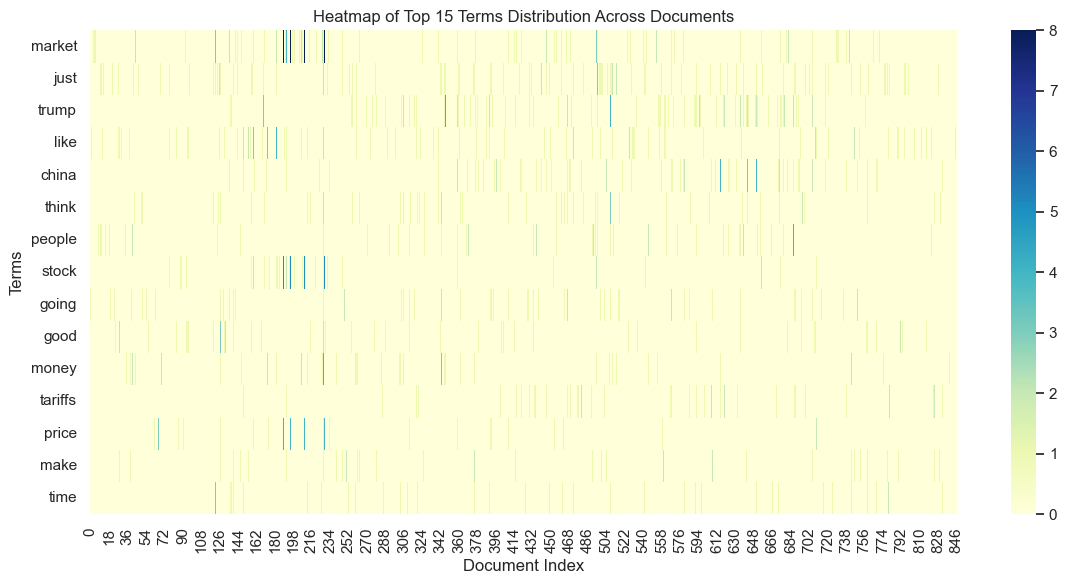

In [15]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.feature_extraction.text import CountVectorizer

# 用 CountVectorizer 建立 term-document matrix
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(Xdf['text'].astype(str))  # 確保是字串

# 計算詞頻
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()

# 取前 N 常見字詞
top_n = 15   # 可調整成 10 或 30
top_indices = term_frequencies.argsort()[-top_n:][::-1]
top_terms = terms[top_indices]

# 建立詞頻矩陣 (文件 × 詞)
X_top = X_counts[:, top_indices].toarray()
df_heatmap = pd.DataFrame(X_top, columns=top_terms)

# 畫 heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap.T, cmap="YlGnBu", cbar=True)  
plt.title(f"Heatmap of Top {top_n} Terms Distribution Across Documents")
plt.xlabel("Document Index")
plt.ylabel("Terms")
plt.tight_layout()
plt.show()


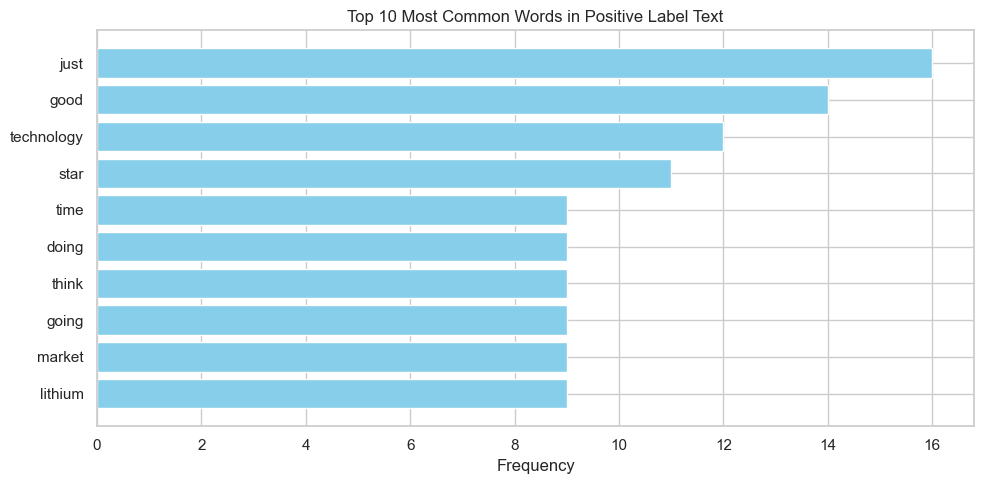

In [11]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import CountVectorizer

# 篩選 label 為 positive 的資料
positive_df = Xdf[Xdf['label'] == 1.0]

# 用 CountVectorizer 建立 term-document matrix
count_vect = CountVectorizer(stop_words='english')  # 移除英文停用詞
X_counts = count_vect.fit_transform(positive_df['text'].astype(str))  # 確保 text 欄位是 str

# 計算詞頻
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()

# 找出前 10 高頻詞
top_indices = term_frequencies.argsort()[::-1][:10]  # 先排序再取前 10
top_terms = terms[top_indices]
top_counts = term_frequencies[top_indices]

# 畫水平條狀圖
plt.figure(figsize=(10,5))
plt.barh(top_terms[::-1], top_counts[::-1], color='skyblue')  # 反轉順序，最多的在上面
plt.xlabel("Frequency")
plt.title("Top 10 Most Common Words in Positive Label Text")
plt.tight_layout()
plt.show()


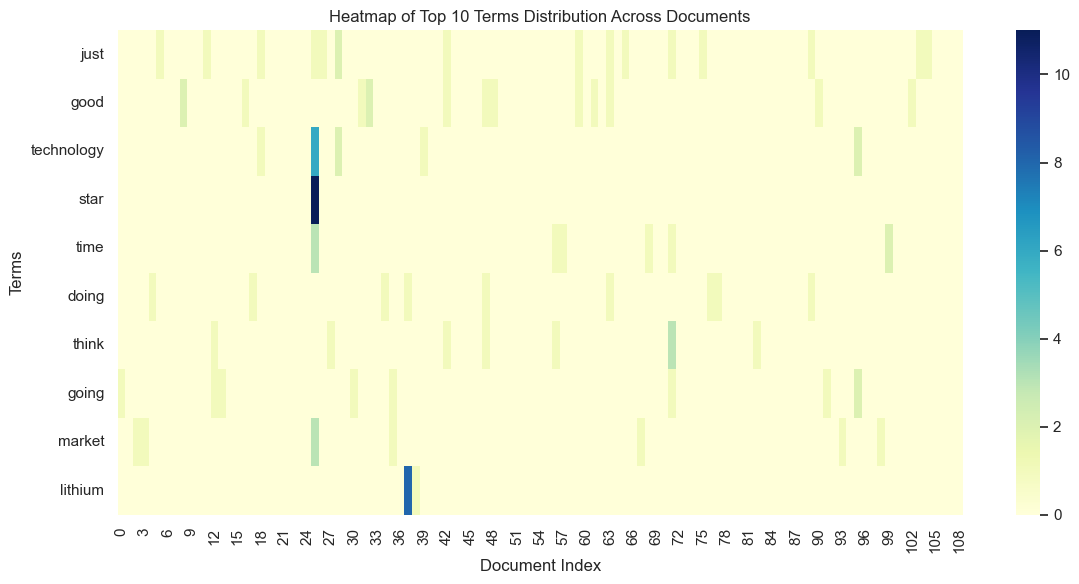

In [16]:
# 篩選 label 為 positive 的資料
positive_df = Xdf[Xdf['label'] == 1.0]

# 用 CountVectorizer 建立 term-document matrix
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(positive_df['text'].astype(str))  # 確保 text 欄位是 str

# 計算詞頻
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()

# 取前 N 常見字詞
top_n = 10   # 可調整成 10 或 30
top_indices = term_frequencies.argsort()[-top_n:][::-1]
top_terms = terms[top_indices]

# 建立詞頻矩陣 (文件 × 詞)
X_top = X_counts[:, top_indices].toarray()
df_heatmap = pd.DataFrame(X_top, columns=top_terms)

# 畫 heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap.T, cmap="YlGnBu", cbar=True)  
plt.title(f"Heatmap of Top {top_n} Terms Distribution Across Documents")
plt.xlabel("Document Index")
plt.ylabel("Terms")
plt.tight_layout()
plt.show()

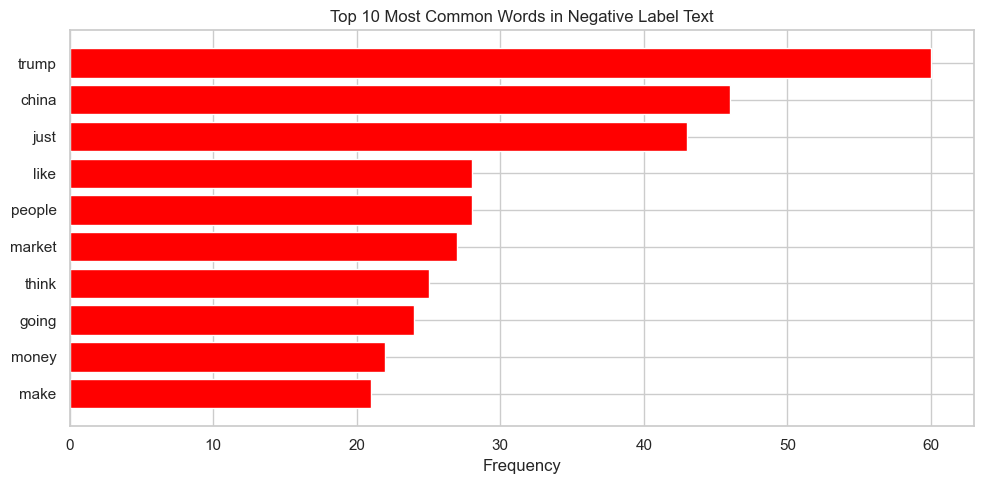

In [12]:
# 篩選 label 為 negative 的資料
negative_df = Xdf[Xdf['label'] == -1.0]

# 用 CountVectorizer 建立 term-document matrix
count_vect = CountVectorizer(stop_words='english')  # 移除英文停用詞
X_counts = count_vect.fit_transform(negative_df['text'].astype(str))  # 確保 text 欄位是 str

# 計算詞頻
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()

# 找出前 10 高頻詞
top_indices = term_frequencies.argsort()[::-1][:10]  # 先排序再取前 10
top_terms = terms[top_indices]
top_counts = term_frequencies[top_indices]

# 畫水平條狀圖
plt.figure(figsize=(10,5))
plt.barh(top_terms[::-1], top_counts[::-1], color='red')  # 反轉順序，最多的在上面
plt.xlabel("Frequency")
plt.title("Top 10 Most Common Words in Negative Label Text")
plt.tight_layout()
plt.show()

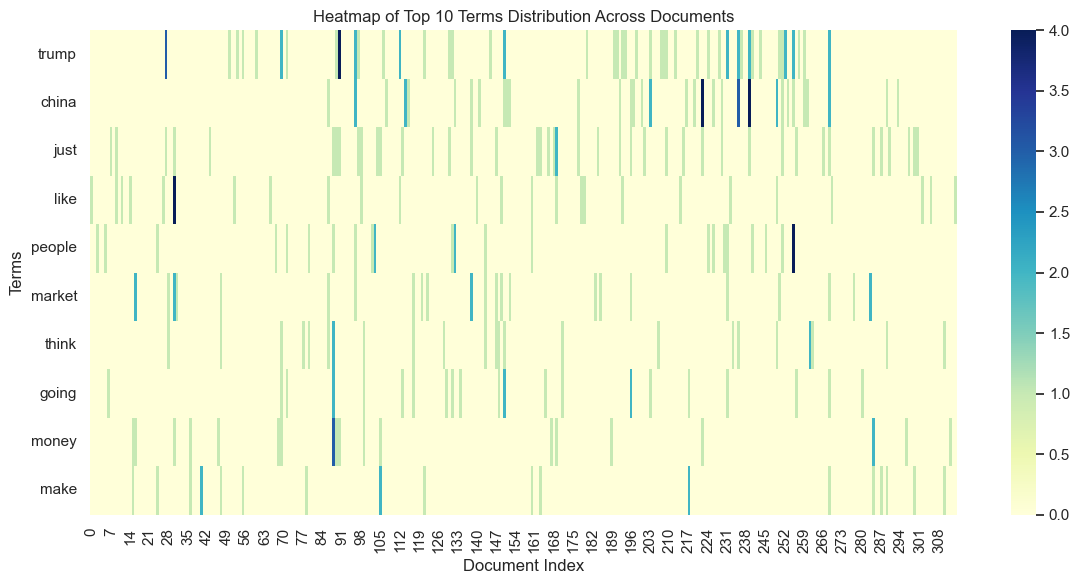

In [17]:
# 篩選 label 為 negative 的資料
negative_df = Xdf[Xdf['label'] == -1.0]

# 用 CountVectorizer 建立 term-document matrix
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(negative_df['text'].astype(str))  # 確保 text 欄位是 str

# 計算詞頻
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()

# 取前 N 常見字詞
top_n = 10   # 可調整成 10 或 30
top_indices = term_frequencies.argsort()[-top_n:][::-1]
top_terms = terms[top_indices]

# 建立詞頻矩陣 (文件 × 詞)
X_top = X_counts[:, top_indices].toarray()
df_heatmap = pd.DataFrame(X_top, columns=top_terms)

# 畫 heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap.T, cmap="YlGnBu", cbar=True)  
plt.title(f"Heatmap of Top {top_n} Terms Distribution Across Documents")
plt.xlabel("Document Index")
plt.ylabel("Terms")
plt.tight_layout()
plt.show()

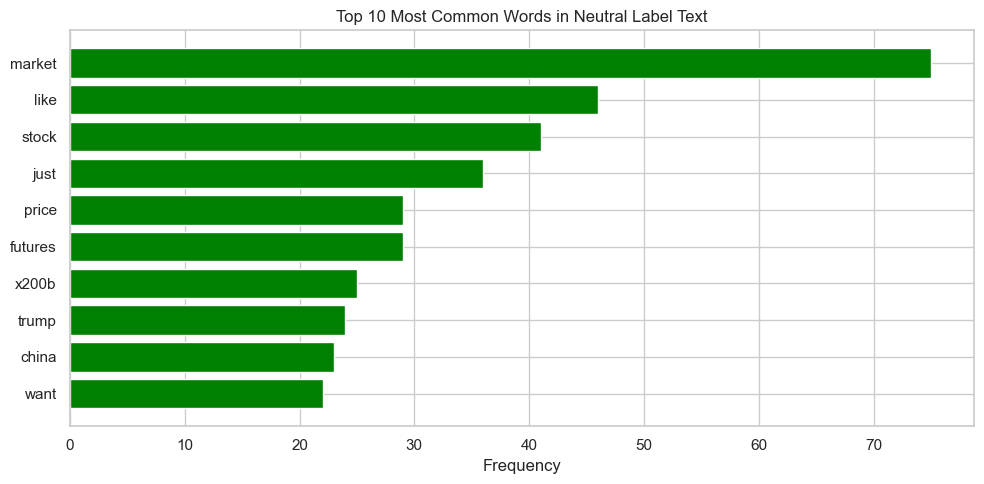

In [13]:
# 篩選 label 為 neutral 的資料
neutral_df = Xdf[Xdf['label'] == 0.0]

# 用 CountVectorizer 建立 term-document matrix
count_vect = CountVectorizer(stop_words='english')  # 移除英文停用詞
X_counts = count_vect.fit_transform(neutral_df['text'].astype(str))  # 確保 text 欄位是 str

# 計算詞頻
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()

# 找出前 10 高頻詞
top_indices = term_frequencies.argsort()[::-1][:10]  # 先排序再取前 10
top_terms = terms[top_indices]
top_counts = term_frequencies[top_indices]

# 畫水平條狀圖
plt.figure(figsize=(10,5))
plt.barh(top_terms[::-1], top_counts[::-1], color='green')  # 反轉順序，最多的在上面
plt.xlabel("Frequency")
plt.title("Top 10 Most Common Words in Neutral Label Text")
plt.tight_layout()
plt.show()

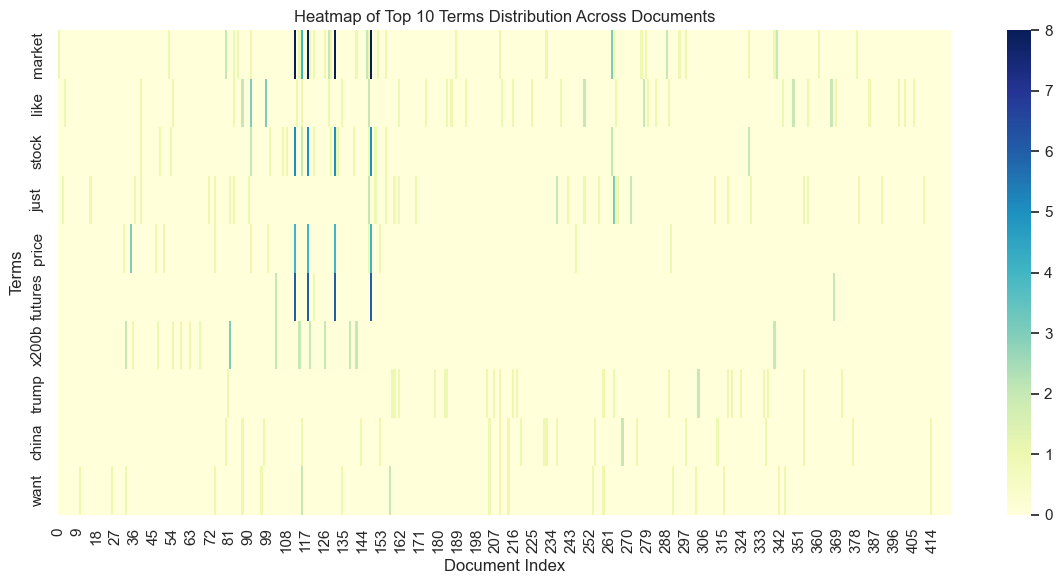

In [19]:
# 篩選 label 為 neutral 的資料
neutral_df = Xdf[Xdf['label'] == 0.0]

# 用 CountVectorizer 建立 term-document matrix
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(neutral_df['text'].astype(str))  # 確保 text 欄位是 str

# 計算詞頻
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()

# 取前 N 常見字詞
top_n = 10   # 可調整成 10 或 30
top_indices = term_frequencies.argsort()[-top_n:][::-1]
top_terms = terms[top_indices]

# 建立詞頻矩陣 (文件 × 詞)
X_top = X_counts[:, top_indices].toarray()
df_heatmap = pd.DataFrame(X_top, columns=top_terms)

# 畫 heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap.T, cmap="YlGnBu", cbar=True)  
plt.title(f"Heatmap of Top {top_n} Terms Distribution Across Documents")
plt.xlabel("Document Index")
plt.ylabel("Terms")
plt.tight_layout()
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here